## PROJECT 3 - PCA Analysis of Diamonds DataSet

$\color{red}{\text{Any kind of plagiarism (help from your friends or getting help from internet) is prohibited. }}$
Submit $\color{red}{\text{only}}$ your jupyter notebook file  to elearn. Any email submission will not be accepted. Everyting must be submitted before the deadline. No extension requests or late submissions will be accepted. The elearn dropbox will close on the due time and date. 

In this project, you will use the diamonds dataset and answer the questions.
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Content
price--> price in US dollars (range is between \\$326 and \\$18,823)

carat--> weight of the diamond (range is between 0.2 and 5.01)

cut--> quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color--> diamond colour, from J (worst) to D (best)

clarity--> a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x--> length in mm (range is between 0 and 10.74)

y--> width in mm (range is between 0 and 58.9)

z--> depth in mm (range is between 0 and 31.8)

depth--> total depth percentage = z / mean(x, y) = 2 * z / (x + y) (range is between 43 and 79)

table--> width of top of diamond relative to widest point (range is between 43-95)

You can see and use pandas dataframe applications on this set from this website: https://www.w3resource.com/python-exercises/pandas/practice-set1/index.php

In [1]:
#include all the modules here
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load in the dataset into a pandas dataframe and show the size of the file and show the first 5 rows of the data
diamonds_data = pd.read_csv("diamonds.csv")
diamonds_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [3]:
# Take only the columns with numeric data and put into a dataframe
diamonds_num_data = diamonds_data.drop(columns = ['cut','color','clarity'])
diamonds_num_data

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
# Find and show the zero values in x, y, z and remove them from your df (low outliers are x<3.5 or y<3.5 or z<2)
# Remove these entries from the dataframe
low_outliers = ((diamonds_num_data['x'] <3.5) |(diamonds_num_data['y'] <3.5)|(diamonds_num_data['z'] <2))
print("The number of low outliers as shown below is {}".format(low_outliers.sum()))
print(" \n ")

print(diamonds_num_data.loc[low_outliers,:])
diamonds_num_data = diamonds_num_data.drop(diamonds_num_data[low_outliers].index)
print(" \n ")
print("The dataframe after removing the low outliers")
diamonds_num_data

The number of low outliers as shown below is 23
 
 
       carat  depth  table  price     x     y     z
2207    1.00   59.1   59.0   3142  6.55  6.48  0.00
2314    1.01   58.1   59.0   3167  6.66  6.60  0.00
4791    1.10   63.0   59.0   3696  6.50  6.47  0.00
5471    1.01   59.2   58.0   3837  6.50  6.47  0.00
10167   1.50   64.0   61.0   4731  7.15  7.04  0.00
11182   1.07   61.6   56.0   4954  0.00  6.62  0.00
11963   1.00   63.3   53.0   5139  0.00  0.00  0.00
13601   1.15   59.2   56.0   5564  6.88  6.83  0.00
14635   1.07   60.6   57.0   5909  6.62  6.67  1.07
15951   1.14   57.5   67.0   6381  0.00  0.00  0.00
20694   1.53   61.9   54.0   8971  7.43  7.50  1.53
21654   1.41   60.7   56.0   9752  7.31  7.22  1.41
24394   2.18   59.4   61.0  12631  8.49  8.45  0.00
24520   1.56   62.2   54.0  12800  0.00  0.00  0.00
26123   2.25   61.3   58.0  15397  8.52  8.42  0.00
26243   1.20   62.1   59.0  15686  0.00  0.00  0.00
27112   2.20   61.2   59.0  17265  8.42  8.37  0.00
27429   2.25

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
# Find and show high outliers, and remove them from your df ( high outliers are the ones y>10 or z>6)
# Remove these entries from the dataframe
high_outliers = ((diamonds_num_data['y'] > 10)|(diamonds_num_data['z'] >6))
print("The number of high outliers as shown below is {}".format(high_outliers.sum()))
print(" \n ")

print(diamonds_num_data.loc[high_outliers,:])
diamonds_num_data = diamonds_num_data.drop(diamonds_num_data[high_outliers].index)
print(" \n ")
print("The dataframe after removing the high outliers")
diamonds_num_data

The number of high outliers as shown below is 15
 
 
       carat  depth  table  price      x      y      z
23644   3.65   67.1   53.0  11668   9.53   9.48   6.38
24067   2.00   58.9   57.0  12210   8.09  58.90   8.06
24328   3.50   62.8   57.0  12587   9.65   9.59   6.03
25998   4.01   61.0   61.0  15223  10.14  10.10   6.17
25999   4.01   62.5   62.0  15223  10.02   9.94   6.24
26194   2.01   65.6   56.0  15562   7.89   7.84   6.16
26431   3.40   66.8   52.0  15964   9.42   9.34   6.27
26444   4.00   63.3   58.0  15984  10.01   9.94   6.31
26534   3.67   62.4   56.0  16193   9.86   9.81   6.13
27130   4.13   64.8   61.0  17329  10.00   9.85   6.43
27415   5.01   65.5   59.0  18018  10.74  10.54   6.98
27630   4.50   65.8   58.0  18531  10.23  10.16   6.72
27679   3.51   62.5   59.0  18701   9.66   9.63   6.03
48410   0.51   61.8   54.7   1970   5.12   5.15  31.80
49189   0.51   61.8   55.0   2075   5.15  31.80   5.12
 
 
The dataframe after removing the high outliers


,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
# Find and show the points of which depth values do not match x, y, and z values, and remove them from your df
# (incorrect depth the ones which satify; abs(2 * z / (x + y)) - depth  < 0.1  )
# Remove these entries from the dataframe
x = diamonds_num_data.x
y= diamonds_num_data.y
z=diamonds_num_data.z
d = diamonds_num_data.depth
diamonds_num_data['emp_depth'] = (2 * z / (x+y)) * 100
ed = diamonds_num_data.emp_depth
diamonds_num_data['depth_diff'] = abs(d - ed)

#Removing the ones with a difference > 0.1
data = (diamonds_num_data['depth_diff'] > 0.1)
diamonds_num_data = diamonds_num_data.drop(diamonds_num_data[data].index)
diamonds_num_data

,carat,depth,table,price,x,y,z,emp_depth,depth_diff
1,0.21,59.8,61.0,326,3.89,3.84,2.31,59.767141,0.032859
2,0.23,56.9,65.0,327,4.05,4.07,2.31,56.896552,0.003448
3,0.29,62.4,58.0,334,4.20,4.23,2.63,62.396204,0.003796
4,0.31,63.3,58.0,335,4.34,4.35,2.75,63.291139,0.008861
5,0.24,62.8,57.0,336,3.94,3.96,2.48,62.784810,0.015190
...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,60.816681,0.016681
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,63.111888,0.011888
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,62.786596,0.013404
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,60.961695,0.038305


# Question 1. How many samples were there in the original data and how many samples left after you clean the outliers?

$\color{red}{\text{Answer:}}$ In the original sample data, there were 53940 records. After cleaning the data, there are 52144 records

### Correlation and Heatmaps

In [7]:
# Find and show the correlation matrix
diamonds_num_data = diamonds_num_data.drop(columns = ['emp_depth','depth_diff'])
diamonds_data_corr = diamonds_num_data.corr()
diamonds_data_corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.024942,0.179699,0.923743,0.978845,0.978163,0.978058
depth,0.024942,1.000000,-0.307307,-0.011565,-0.027911,-0.030379,0.093437
table,0.179699,-0.307307,1.000000,0.127266,0.192920,0.187719,0.152653
price,0.923743,-0.011565,0.127266,1.000000,0.888144,0.889521,0.883748
x,0.978845,-0.027911,0.192920,0.888144,1.000000,0.998963,0.992120
y,0.978163,-0.030379,0.187719,0.889521,0.998963,1.000000,0.991820
z,0.978058,0.093437,0.152653,0.883748,0.992120,0.991820,1.000000


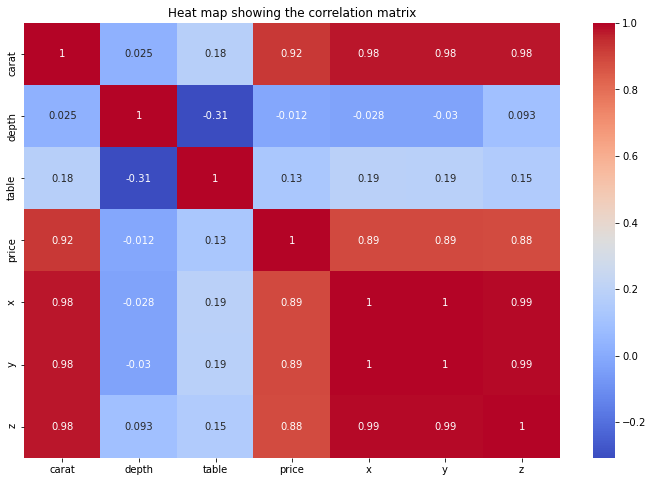

In [8]:
# Use seaborn heatmap to see the correlations
plt.rcParams["figure.figsize"] = [12,8]
ax = sns.heatmap(diamonds_data_corr, annot=True, cmap='coolwarm').set_title("Heat map showing the correlation matrix")

In [9]:
def findMaxCorr(data):
    arr = np.array(data.to_numpy())
    num = np.unique(arr)[-2]
    val = diamonds_data_corr.columns[(diamonds_data_corr == num).any()]
    return val[0]
price_data = diamonds_data_corr["price"]
feat = findMaxCorr(price_data)
feat

'carat'

## Question 2. Which feature has the highest correlation with the price, please explain your graph?
$\color{red}{\text{Answer:}}$ From the graph, we can deduce that the carat of the diamond is highly correlated with the price with the highest correlation value of 0.92

In [10]:
### PCA Analysis

In [11]:
# Create a PCA object and calculate the principal components and show them.
# Also transform the data using the PCA
# diamonds_num_data = diamonds_data.drop(columns = ['cut','color','clarity'])
diamonds_scaled_data = preprocessing.scale(diamonds_num_data)
diamonds_scaled_data

pca = PCA(n_components = 3)
pca.fit(diamonds_scaled_data)
diamonds_pca_data = pca.transform(diamonds_scaled_data)
print(pca.components_)

[[ 0.45048568 -0.00209725  0.09780581  0.42356814  0.45090377  0.45082895
   0.44891129]
 [-0.03454976 -0.72944548  0.67668023 -0.03538847  0.00273288  0.00140702
  -0.08693493]
 [-0.00621292  0.67479844  0.72694411 -0.10284451 -0.0409455  -0.04918881
   0.03857014]]


## Question 3. How many principal components will be calculated if you don't specify the components number for this example? Why? Explain it.
$\color{red}{\text{Answer:}}$ Without specifying, there were 7 PCA's calculated. This is because our data is a 7-dimensional data. 

In [12]:
# Show the variance and the variance ratios in %
print(pca.explained_variance_)
print("\n")
print(pca.explained_variance_ratio_ * 100)

[4.84084007 1.29702208 0.67973994]


[69.15353192 18.52853149  9.7103843 ]


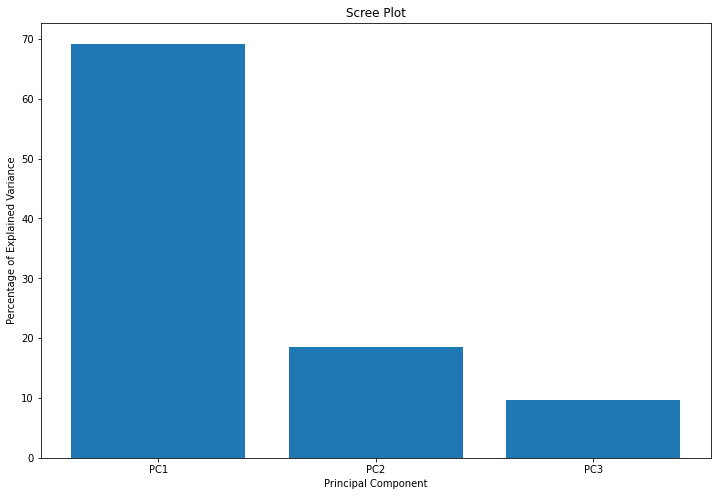

In [13]:
# Plot the variace ratios as a bar graph
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

## Question 4. As a good data visualizer expert, how many principal components should be used to transform this data without loosing much information? Explain your calculations.
$\color{red}{\text{Answer:}}$ From the variance ratio calculated above and after calculating the eigen values(explained_variance_) of the matrix, which is the amount of variance explained by each PCA's, we get 3 PCA's. This mean that 3 PCA's are able to explain 95% of the variance in the data

In [14]:
# Create a new dataframe using the new data set
diamonds_pca_data = pd.DataFrame(diamonds_pca_data, columns=['feat1','feat2','feat3'])
diamonds_pca_data

,feat1,feat2,feat3
0,-3.099619,2.313546,0.408997
1,-2.741416,5.038883,0.314292
2,-2.666814,0.003517,0.659652
3,-2.465572,-0.479340,1.087407
4,-3.071414,-0.487888,0.537034
...,...,...,...
52139,-0.226619,0.370775,-0.580335
52140,-0.275051,-1.447134,-0.124568
52141,-0.146007,0.243755,1.374351
52142,0.415010,0.533507,-0.175187


<IPython.core.display.Javascript object>


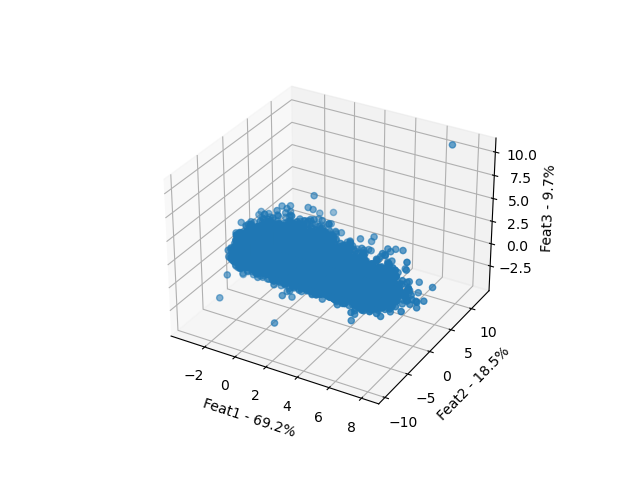

In [15]:
# Draw the figure according to your answer from question 4. (2D or 3D or 4D graph, be careful???)
# plt.figure(2)
# plt.scatter(diamonds_pca_data.feat1, diamonds_pca_data.feat2,diamonds_pca_data.feat3)
# plt.title('My PCA Graph')
# plt.xlabel('Feat1 - {0}%'.format(per_var[0]))
# plt.ylabel('Feat2 - {0}%'.format(per_var[1]))
# # plt.zlabel('Feat3 - {0}%'.format(per_var[2]))
# for sample in diamonds_pca_data.index:
#     plt.annotate(sample, (diamonds_pca_data.feat1.loc[sample], diamonds_pca_data.feat2.loc[sample],diamonds_pca_data.feat3.loc[sample]))

# plt.show()
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

feat1 = np.array(diamonds_pca_data['feat1'])
feat2 = np.array(diamonds_pca_data['feat2'])
feat3 = np.array(diamonds_pca_data['feat3'])

fig = plt.figure()
axis2 = fig.add_subplot(projection='3d')

axis2.scatter3D(feat1,feat2,feat3)

axis2.set_xlabel('Feat1 - {0}%'.format(per_var[0]))
axis2.set_ylabel('Feat2 - {0}%'.format(per_var[1]))
axis2.set_zlabel('Feat3 - {0}%'.format(per_var[2]))

plt.show()

In [16]:
# Show the most important PC and show the column which has the highest affect on the variance
print(pca.components_[0])
print(np.argmax(np.abs((pca.components_[0])))) #0-PC1, 1-PC2, 2-PC3...

[ 0.45048568 -0.00209725  0.09780581  0.42356814  0.45090377  0.45082895
  0.44891129]
4


## Question 5. Which feature/features have the highest effect on the variance or in other words, which feature is responsible from the differences between diamonds the most? Explain it.
$\color{red}{\text{Answer:}}$ This shows that the feature X (length of the diamond) has the most significant effect on the variance of the data. Although it is arguable that the feature Y (width of the diamond) also has an effect on the variance because the difference between X and Y is negligible

## GRADUATE STUDENTS WORK. Find and show the realtions between the color and the price. Explain your approach and discuss your calculations and the graphs below.
$\color{red}{\text{Answer:}}$ First i get the data and i plot the price on a distibution plot which shows me how prices are distributed. This gives me an idea on the range of data to use for further analysis. from the plot below i can see that the price is heavily distributed between the mark 300 to about 2500. Now i can decide to use that range of data to continue my analysis

I used a clustermap in line [114] to establish the possibility of any relationship between the color and price features and from observation, there is NOT a strong correlation between them. Taking a closer look at color D and E, the prices of the diamond with the color D or E seem to be closely correlated and higher than the rest. so is the case for color F and G. 

Overall, diamonds with the color D seem to have the highest price while diamonds witht the color I are the lowest and the jointplot in line [120] supports this analysis. We can see that at best diamonds with colors D and E (0 and 1) are higher priced and as we go down the slope, the price decreases. 

In [17]:
data = diamonds_data
i = data.min()['price']
i

326

<IPython.core.display.Javascript object>


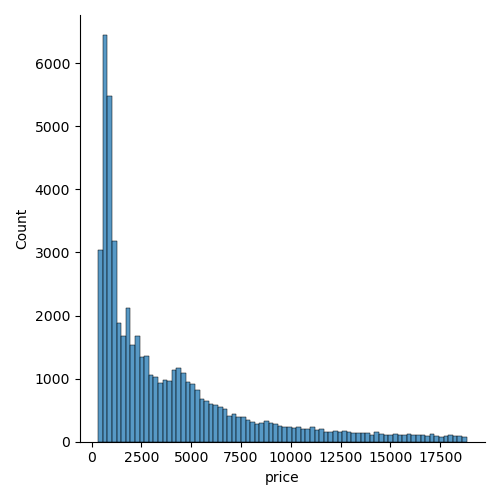

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53635,0.30,Ideal,I,VVS1,62.1,56.0,552,4.30,4.33,2.68
53636,0.30,Ideal,D,SI1,61.6,57.0,552,4.28,4.32,2.65
53637,0.30,Very Good,D,SI1,62.5,57.0,552,4.26,4.28,2.67
53638,0.30,Ideal,D,SI1,61.0,57.0,552,4.29,4.33,2.63


In [18]:
# We use this plot to visualize the distribution of the prices.
# this gives us an idea of how spread or clustered the prices are
plt.rcParams["figure.figsize"] = [10,8]
sns.displot(data['price'])
sec_data = data[data['price'].between(i,1200)]
sec_data

<IPython.core.display.Javascript object>


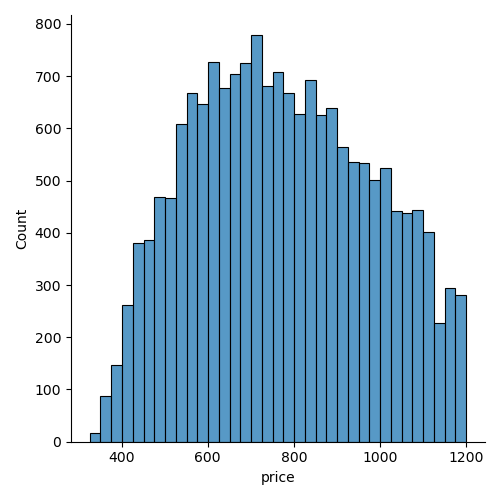

In [19]:
# After visualization from above, we can deduce that there are more diamonds wiht prices ranging from 300 to about 1200
# we pull out that part of the data for indepth analysis
plt.rcParams["figure.figsize"] = [10,8]
sns.displot(sec_data['price'])

In [20]:
# Generate a number to represent the colors. We use the number for analysis
df = sec_data.filter(['color','price','carat'])
df = df.sort_values('color')
df['ColorId'] = (df.groupby(['color']).cumcount() == 0).astype(int)
df['ColorId'] = df['ColorId'].cumsum()
df

,color,price,carat,ColorId
53639,D,552,0.30,1
35684,D,910,0.35,1
35682,D,910,0.32,1
27805,D,650,0.30,1
35681,D,910,0.32,1
...,...,...,...,...
33304,J,827,0.38,7
10043,J,418,0.31,7
40204,J,1122,0.53,7
39754,J,1094,0.56,7


In [21]:
# Normalizing the data for our plot
df = df.pivot_table(index = 'color')
df
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df

,ColorId,carat,price
color,,,
D,0.000000,0.004270,0.900716
E,0.166667,0.000000,0.952210
F,0.333333,0.107163,1.000000
G,0.500000,0.134081,0.895936
H,0.666667,0.084850,0.255684
I,0.833333,0.376796,0.000000
J,1.000000,1.000000,0.121312


<IPython.core.display.Javascript object>


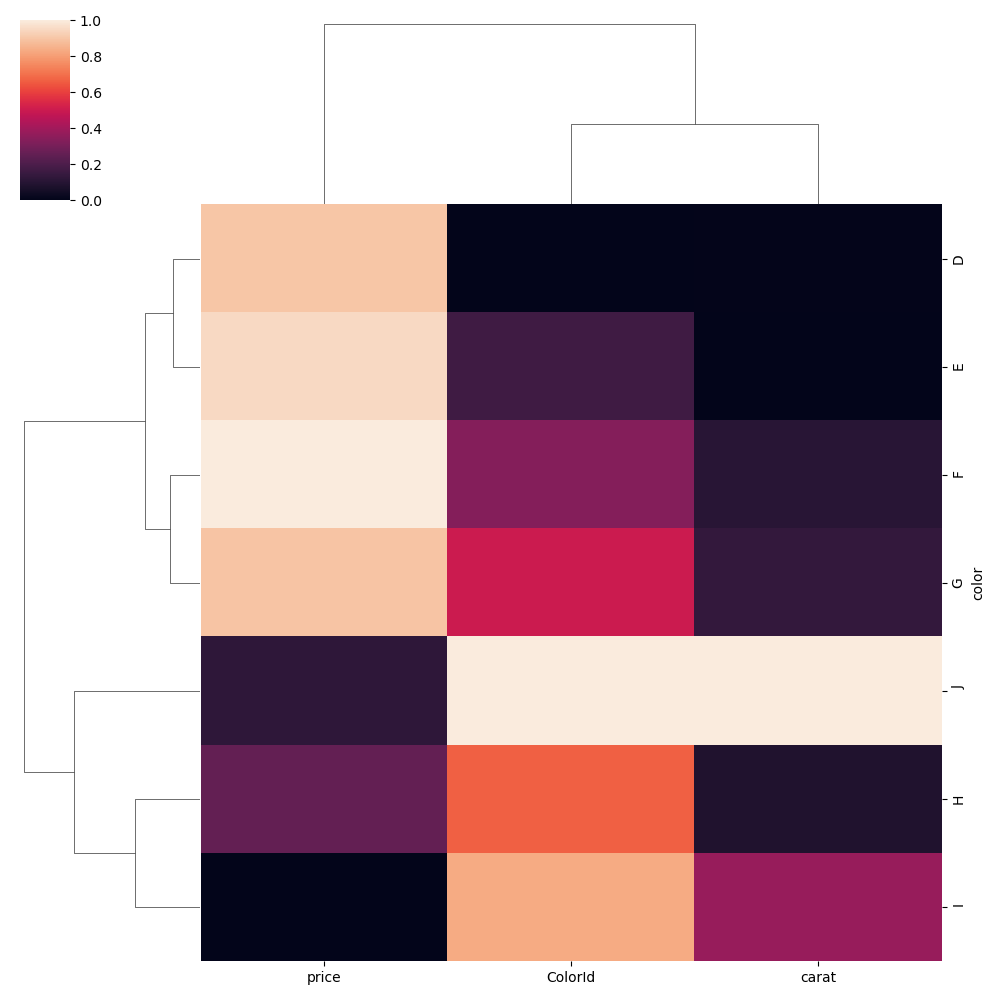

In [22]:
sns.clustermap(normalized_df)

In [23]:
# The second analysis utilizes a pairplot and so we prep our data as follows
diamonds_data = sec_data.filter(['color','price','carat'])
diamonds_data['color']= diamonds_data['color'].astype('category').cat.codes
diamonds_data

,color,price,carat
0,1,326,0.23
1,1,326,0.21
2,1,327,0.23
3,5,334,0.29
4,6,335,0.31
...,...,...,...
53635,5,552,0.30
53636,0,552,0.30
53637,0,552,0.30
53638,0,552,0.30


<IPython.core.display.Javascript object>


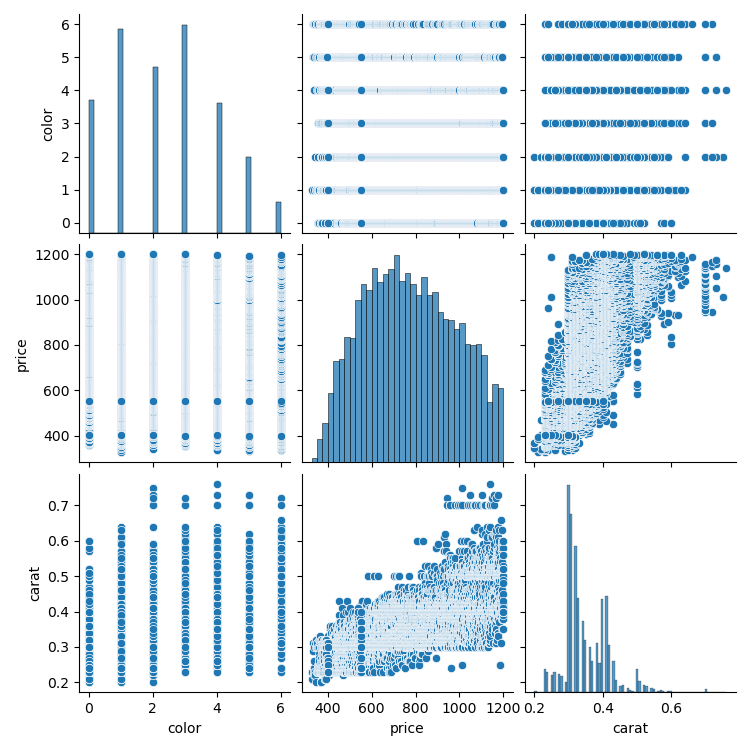

In [24]:
# The plot at (1,0) showing the distribution of price wrt to color 
sns.pairplot(data=diamonds_data)

<IPython.core.display.Javascript object>


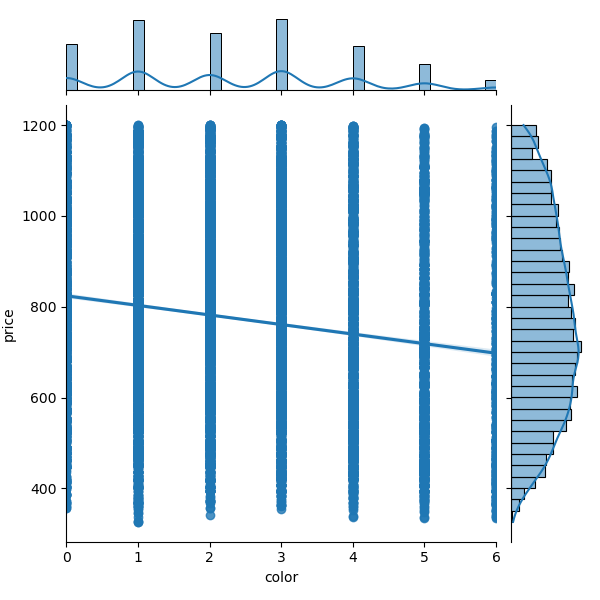

In [25]:
# This is the jointplot supports the analysis we made in the cluster map
sns.jointplot(x='color', y='price', data= diamonds_data, kind='reg')